# Implementation of Risk Prediction in Life Insurance Industry using Supervised Learning Algorithms


This project is developed by **Group 9 (Xiaorui Zhang, Yuxin Cheng, Zhanfei Gu)**.

The goal of this project is to predict risk categories for life insurance applicants using advanced supervised learning techniques.

The dataset, sourced from the **Prudential Life Insurance Assessment competition** on Kaggle, contains features that reflect various applicant details and their associated risk levels.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Please kindly upload the attached train.csv file to your Google Colab environment run our code
# This dataset can be downloaded from https://www.kaggle.com/c/prudential-life-insurance-assessment/data
#  with name: train.csv (the training set, contains the Response values)
uploaded = files.upload()

Saving train.csv to train.csv


## Exploratory Data Analysis (EDA)
This part performs Exploratory Data Analysis (EDA) and fits a Multinomial Logistic Regression model to predict life insurance risk levels based on several continuous variables (e.g., age, height, weight, and BMI) and a categorical response variable (Response).

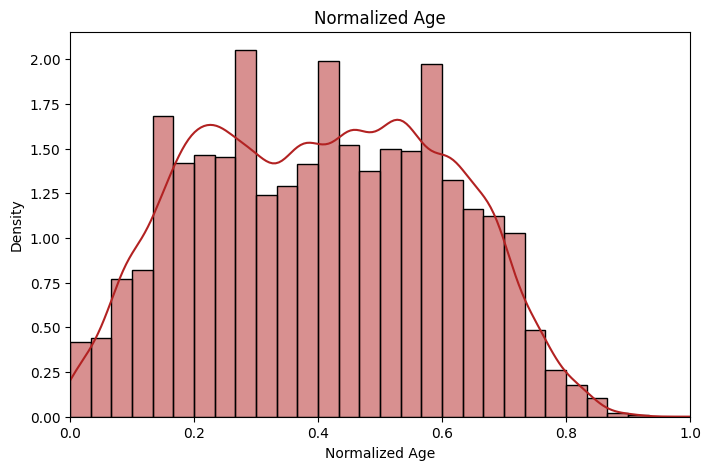

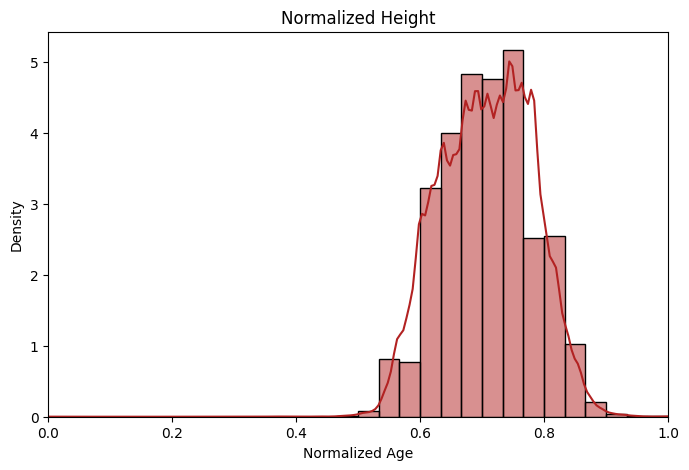

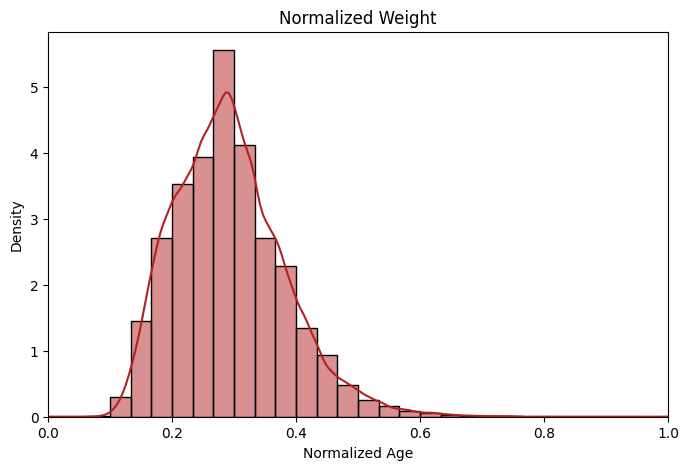

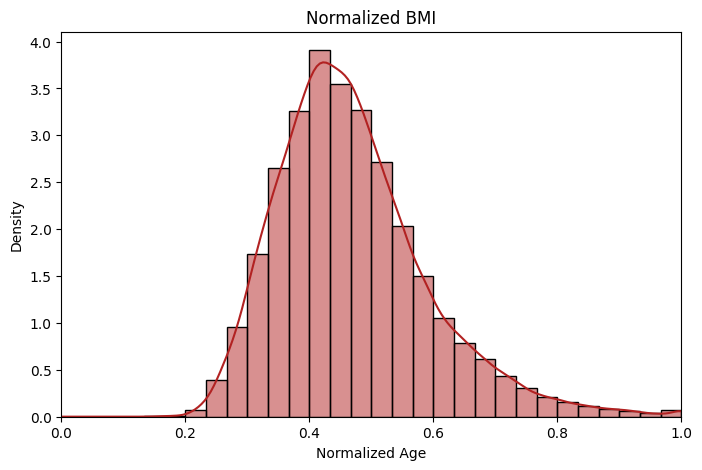

            Age  Height  Weight     BMI
Mean     0.4056  0.7073  0.2926  0.4695
Median   0.4030  0.7091  0.2887  0.4513
Std Dev  0.1972  0.0742  0.0890  0.1222
IQR      0.3284  0.1091  0.1192  0.1473


<ipython-input-3-51de8535b0b6>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=response, palette=palette)


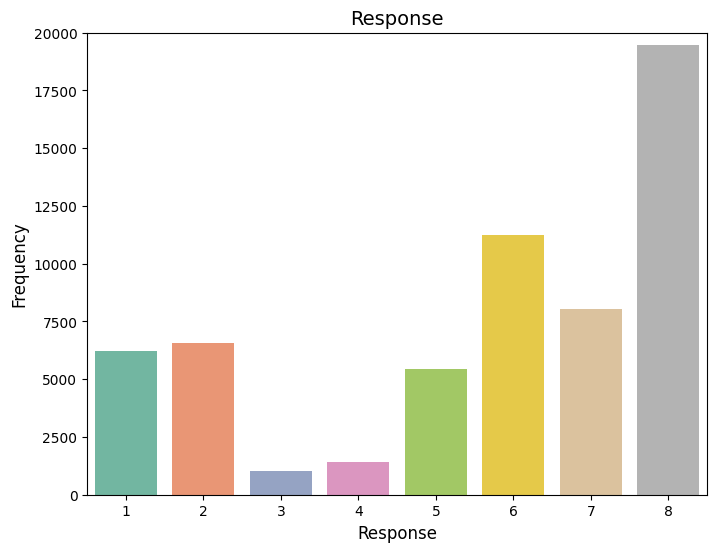

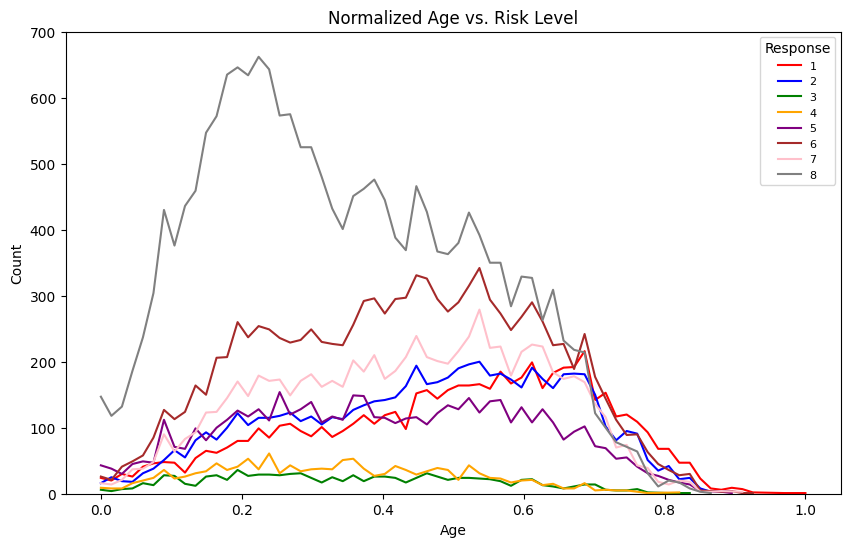

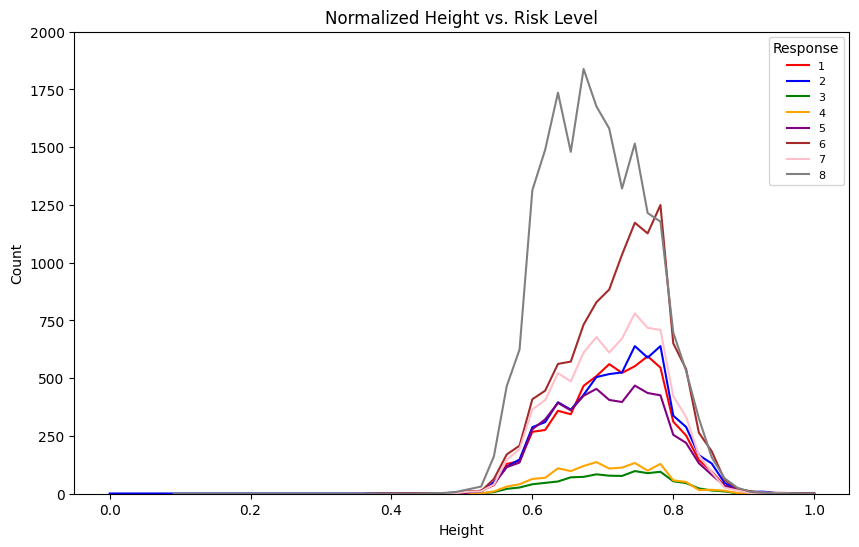

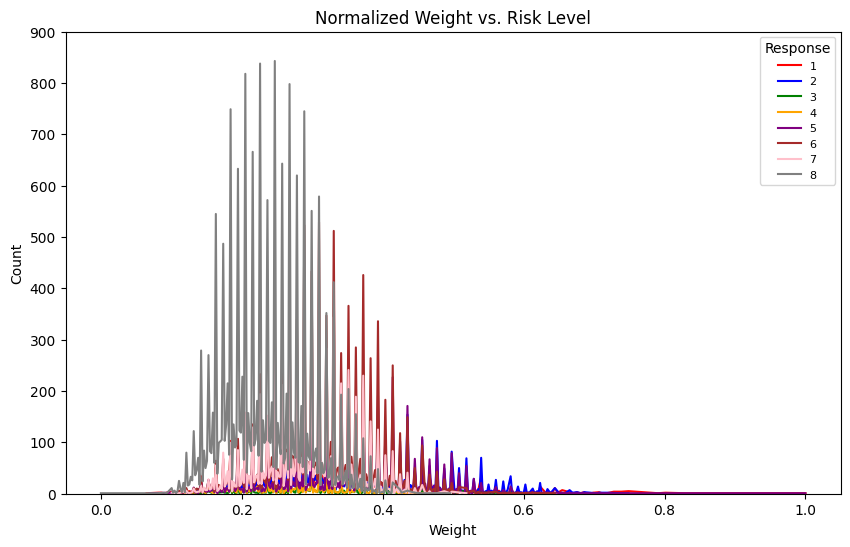

<ipython-input-3-51de8535b0b6>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='BMI', data=data, palette='Set2')


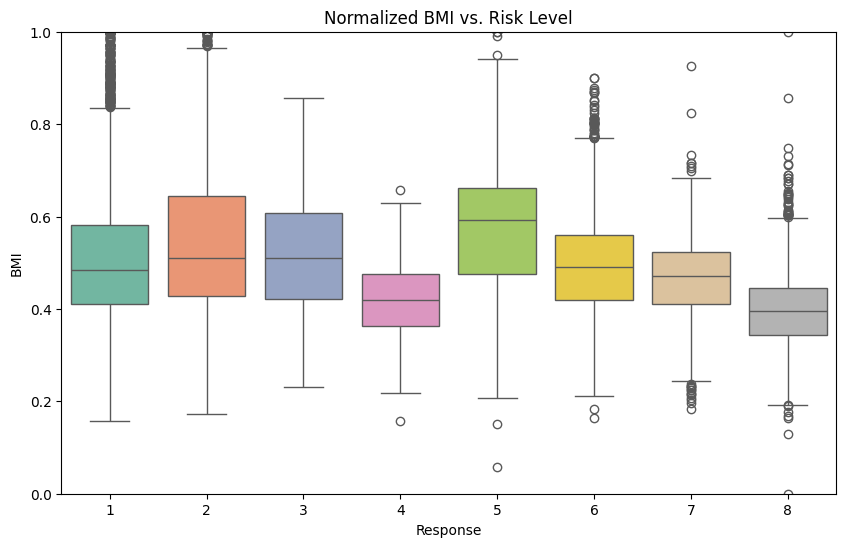

Optimization terminated successfully.
         Current function value: 1.618823
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:               Response   No. Observations:                59381
Model:                        MNLogit   Df Residuals:                    59346
Method:                           MLE   Df Model:                           28
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.1048
Time:                        16:59:19   Log-Likelihood:                -96127.
converged:                       True   LL-Null:                   -1.0738e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
Response=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9230      0.818     -3.574      0.000      -4.526      -1.320
Ins_Age       -0.9189      0.

In [ ]:
import seaborn as sns
from statsmodels.formula.api import mnlogit
from scipy.stats import norm

# Import the Data
data = pd.read_csv('train.csv')
#print(data.head)

#######################################################################################################################################################
# EDA

# Univerate Analysis
# Continuous Variables

# Normalized Age
ins_age = data['Ins_Age']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Age", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized Height
ins_age = data['Ht']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Height", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized Weight
ins_age = data['Wt']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized Weight", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()

# Normalized BMI
ins_age = data['BMI']
plt.figure(figsize=(8, 5))
sns.histplot(ins_age, kde=True, color='firebrick', bins=30, stat="density")
plt.xlabel("Normalized Age", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Normalized BMI", fontsize=12)
plt.xlim(0, 1)
plt.grid(visible=False)
plt.show()


# Summary Statistics
def IQR(x):
    # Calculate summary statistics
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)

    # Compute IQR
    return q3 - q1
# Compute Mean
m1 = [data['Ins_Age'].mean(), data['Ht'].mean(), data['Wt'].mean(), data['BMI'].mean()]
# Compute Median
m2 = [data['Ins_Age'].median(), data['Ht'].median(), data['Wt'].median(), data['BMI'].median()]
# Compute Standard Deviation
d = [data['Ins_Age'].std(), data['Ht'].std(), data['Wt'].std(), data['BMI'].std()]
# Compute IQR (Interquartile Range)
i = [data['Ins_Age'].quantile(0.75) - data['Ins_Age'].quantile(0.25),
     data['Ht'].quantile(0.75) - data['Ht'].quantile(0.25),
     data['Wt'].quantile(0.75) - data['Wt'].quantile(0.25),
     data['BMI'].quantile(0.75) - data['BMI'].quantile(0.25)]
# Combine results into a DataFrame and round to 4 decimal places
summary_stats = pd.DataFrame([m1, m2, d, i], columns=["Age", "Height", "Weight", "BMI"],
                             index=["Mean", "Median", "Std Dev", "IQR"])
# Round the DataFrame to 4 decimal places
summary_stats = summary_stats.round(4)
# Display the summary statistics
print(summary_stats)

# Response Variable
# Example response data
response = data['Response']
# Determine the number of unique categories in 'response'
unique_categories = len(set(response))
# Generate a palette with the correct number of colors
palette = sns.color_palette("Set2", unique_categories)
# Create a count plot (similar to barplot in R)
plt.figure(figsize=(8, 6))
sns.countplot(x=response, palette=palette)
# Customize the plot
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Response', fontsize=14)
plt.ylim(0, 20000)  # Adjust the y-axis limit if needed
# Show the plot
plt.show()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Separate Subsets by Response Variable
r1 = data[data['Response'] == 1]
r2 = data[data['Response'] == 2]
r3 = data[data['Response'] == 3]
r4 = data[data['Response'] == 4]
r5 = data[data['Response'] == 5]
r6 = data[data['Response'] == 6]
r7 = data[data['Response'] == 7]
r8 = data[data['Response'] == 8]

# Age Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    age_counts = r['Ins_Age'].value_counts().sort_index()
    plt.plot(age_counts.index, age_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Age vs. Risk Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 700)
plt.show()

# Height Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    ht_counts = r['Ht'].value_counts().sort_index()
    plt.plot(ht_counts.index, ht_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Height vs. Risk Level')
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 2000)
plt.show()

# Weight Analysis
plt.figure(figsize=(10, 6))
for i, r in enumerate([r1, r2, r3, r4, r5, r6, r7, r8], start=1):
    wt_counts = r['Wt'].value_counts().sort_index()
    plt.plot(wt_counts.index, wt_counts.values, label=str(i), color=colors[i-1])

plt.title('Normalized Weight vs. Risk Level')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', fontsize=8)
plt.ylim(0, 900)
plt.show()

# BMI Analysis (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='BMI', data=data, palette='Set2')
plt.title('Normalized BMI vs. Risk Level')
plt.xlabel('Response')
plt.ylabel('BMI')
plt.ylim(0, 1)
plt.show()

# Multivariate Analysis - Multinomial Logistic Regression
# Model formula: Response ~ Ins_Age + Ht + Wt + BMI
model = mnlogit('Response ~ Ins_Age + Ht + Wt + BMI', data=data)
result = model.fit()

# Summarize the model results
print(result.summary())

### Binary Classification Transformation
This code modifies the Response variable from a multi-class categorical variable (values ranging from 1 to 8) into a binary variable to simplify the prediction problem into a binary classification task:

In [ ]:
# Change Response to Binary Response - Approved or Rejected, 0 means approved (class 1-7), and 1 means rejected (class 8)
print(data['Response'].value_counts())

data = data.replace({'Response': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1}})
print(data['Response'].value_counts())

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64
Response
0    39892
1    19489
Name: count, dtype: int64


### Plotting the Updated Response Variable
This section of the code visualizes the binary Response variable after transforming it into a binary classification (0 = Approved, 1 = Rejected). The goal is to analyze the class distribution to understand the data balance between the two classes.

<ipython-input-7-62fa4d38481f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=response, palette=palette)


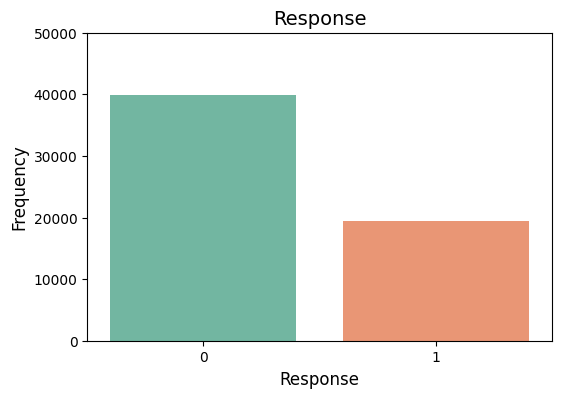

In [ ]:
# Plot the Updated Respone Variable
response = data['Response']
# Determine the number of unique categories in 'response'
unique_categories = len(set(response))
# Generate a palette with the correct number of colors
palette = sns.color_palette("Set2", unique_categories)
# Create a count plot (similar to barplot in R)
plt.figure(figsize=(6, 4))
sns.countplot(x=response, palette=palette)
# Customize the plot
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Response', fontsize=14)
plt.ylim(0, 50000)  # Adjust the y-axis limit if needed
# Show the plot
plt.show()

colors = ['red', 'blue']

## Data Cleaning
This section of the code is responsible for cleaning the dataset by addressing missing values and preparing it for modeling. It includes handling missing data, removing irrelevant columns, and exporting the cleaned data.



In [ ]:
# Data Cleaning

# Import required libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Print the Original shape
print(f"Original shape: {data.shape}")

# Step 1: Delete attributes with more than 30% missing data
missing_threshold = 0.3 * len(data)
columns_to_keep = [col for col in data.columns if data[col].isna().sum() < missing_threshold]
cleandata = data[columns_to_keep]
print(f"Shape after removing columns with >30% missing data: {cleandata.shape}")

# Step 2: Multiple Imputation for Missing Values
numerical_cols = cleandata.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = cleandata.select_dtypes(include=['object', 'category']).columns

# Impute missing numerical values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
cleandata[numerical_cols] = imputer.fit_transform(cleandata[numerical_cols])

# Impute missing categorical values with the most frequent value
cleandata[categorical_cols] = cleandata[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Drop column Id as it referred as unique identifiers associated with each application, no contribution for classification results
cleandata = cleandata.drop('Id', axis=1)
# Print the shape after data cleaning
print(f"Shape after data cleaning: {cleandata.shape}")

# Import our clean data to csv file after data imputation
cleandata.to_csv("train_clean.csv", index=False)

Original shape: (59381, 128)
Shape after removing columns with >30% missing data: (59381, 119)


<ipython-input-8-b0077aafa755>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata[numerical_cols] = imputer.fit_transform(cleandata[numerical_cols])
<ipython-input-8-b0077aafa755>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata[categorical_cols] = cleandata[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


Shape after data cleaning: (59381, 118)


## Data Preprocessing for Machine Learning
This section of the code preprocesses the cleaned dataset to prepare it for machine learning modeling. It includes encoding categorical variables, feature selection, splitting the dataset into training and testing sets, and other essential transformations.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import os

# Data Pre-processing

# Convert categorical variables to one-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_data = encoder.fit_transform(cleandata[categorical_cols])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical columns
cleandata_onehot = cleandata.copy().drop(columns=categorical_cols).reset_index(drop=True)
cleandata_onehot = pd.concat([cleandata_onehot, encoded_df], axis=1)
print(cleandata_onehot.shape)

# Split the cleandata_onehot to train and test data
X = cleandata_onehot.copy().drop(columns = "Response") # Select the feature columns
y = cleandata_onehot['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59381, 135)
(44535, 134)
(14846, 134)
(44535,)
(14846,)


## Applying PCA for Dimensionality Reduction
This section of the code implements Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining the most important information. PCA helps simplify the dataset, reduce computational complexity, and minimize noise, which can improve model performance.



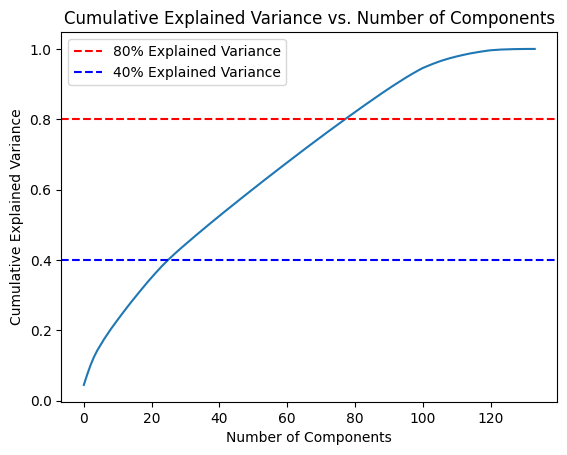

Number of components to retain 80% explained variance: 79
Number of components to retain 40% explained variance: 26


In [ ]:
# Data Pre-processing: PCA
# Apply PCA to reduce the dimensionality

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Only transform on test data

# Step 2: Select the number of components
pca = PCA()
pca.fit(X_train_scaled)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y = 0.8, color='red', linestyle='--', label = '80% Explained Variance')
plt.axhline(y = 0.4, color='blue', linestyle='--', label = '40% Explained Variance')
plt.legend(loc = 'upper left')
plt.show()

n_components_1 = np.argmax(cum_explained_variance >= 0.8) + 1
n_components_2 = np.argmax(cum_explained_variance >= 0.4) + 1

print(f"Number of components to retain 80% explained variance: {n_components_1}")
print(f"Number of components to retain 40% explained variance: {n_components_2}")

# Step 3: Apply PCA with the selected number of components

pca_80 = PCA(n_components=n_components_1, random_state=0)
X_train_pca_80 = pca_80.fit_transform(X_train_scaled)
X_test_pca_80 = pca_80.transform(X_test_scaled)

pca_40 = PCA(n_components=n_components_2, random_state=0)
X_train_pca_40 = pca_40.fit_transform(X_train_scaled)
X_test_pca_40 = pca_40.transform(X_test_scaled)

# Step 4: Convert PCA output to a DataFrame (optional, for better interpretability)
X_train_pca_df_80 = pd.DataFrame(X_train_pca_80, columns=[f'PCA_{i+1}' for i in range(X_train_pca_80.shape[1])])
X_test_pca_df_80 = pd.DataFrame(X_test_pca_80, columns=[f'PCA_{i+1}' for i in range(X_test_pca_80.shape[1])])

X_train_pca_df_40 = pd.DataFrame(X_train_pca_80, columns=[f'PCA_{i+1}' for i in range(X_train_pca_80.shape[1])])
X_test_pca_df_40 = pd.DataFrame(X_test_pca_80, columns=[f'PCA_{i+1}' for i in range(X_test_pca_80.shape[1])])

## Logistic Regression with Optimized Search and PCA

### Logistic Regression with PCA (80%)
This section performs hyperparameter optimization and trains a Logistic Regression model on the PCA-reduced dataset (retaining 80% of the variance). It evaluates the model's performance on the training and testing sets using various metrics.

In [ ]:
# Logistic Regression with Optimized Search, PCA (80%)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Randomized Search (As n_iter = 6, this is equivalent to grid search)
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train_pca_80, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train_pca_80, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_80, y_train)
test_accuracy = best_model.score(X_test_pca_80, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_80)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca_80)[:,1]) #This was changed compared to the original code

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.7934 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Training Accuracy: 0.7954
Testing Accuracy: 0.7927
Mean Absolute Error: 0.2073
Mean Squared Error: 0.2073
ROC AUC Score: 0.8647


### Logistic Regression with PCA (40%)
This section trains a Logistic Regression model using features derived from PCA (40% explained variance) and optimizes its hyperparameters. The process is similar to the one for PCA (80%) but uses fewer components, reducing the dataset's dimensionality even further.

In [ ]:
# Logistic Regression with Optimized Search, PCA(40%)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Use PCA-40 dataset for both training and evaluation
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train_pca_40, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train_pca_40, y_train)

# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_pca_40, y_train)
test_accuracy = best_model.score(X_test_pca_40, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_pca_40)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_pca_40)[:,1])

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.7854 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
Training Accuracy: 0.7862
Testing Accuracy: 0.7830
Mean Absolute Error: 0.2170
Mean Squared Error: 0.2170
ROC AUC Score: 0.8530


### Logistic Regression with Unstandardized Original Data
This section trains and optimizes a Logistic Regression model using the original (non-PCA-transformed) dataset. By comparing its performance with the PCA-transformed models, we can determine whether dimensionality reduction improved the model's accuracy or efficiency.

In [ ]:
# Logistic Regression with Optimized Search (Unstandardized Original Data)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Use PCA-40 dataset for both training and evaluation
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train, y_train)


# Evaluate on training and test sets
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.8150 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
Training Accuracy: 0.8163
Testing Accuracy: 0.8131
Mean Absolute Error: 0.1869
Mean Squared Error: 0.1869
ROC AUC Score: 0.8853


### Logistic Regression with Standardized Original Data
This section trains and optimizes a Logistic Regression model using the original (non-PCA-transformed) dataset. By comparing its performance with the PCA-transformed models, we can determine whether dimensionality reduction improved the model's accuracy or efficiency.

In [ ]:
# Logistic Regression with Optimized Search (Standardized Original Data)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Define logistic regression model
model = LogisticRegression()

# Reduced hyperparameter grid
solvers = ['liblinear', 'lbfgs']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Cross-validation with fewer splits and repeats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

# Use PCA-40 dataset for both training and evaluation
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=6,
                                   n_jobs=-1, cv=cv, scoring='accuracy', random_state=0)
random_result = random_search.fit(X_train_scaled, y_train)

# Best parameters and results
print(f"Best Accuracy: {random_result.best_score_:.4f} using {random_result.best_params_}")

# Train the final model
best_model = LogisticRegression(**random_result.best_params_)
best_model.fit(X_train_scaled, y_train)


# Evaluate on training and test sets
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and error metrics
y_pred = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:,1])

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Best Accuracy: 0.8146 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Training Accuracy: 0.8162
Testing Accuracy: 0.8128
Mean Absolute Error: 0.1872
Mean Squared Error: 0.1872
ROC AUC Score: 0.8852


## Linear Support Vector Machine (SVM) with SGDClassifier and PCA

### Linear SVM with PCA (80%)
This code trains and optimizes a Linear Support Vector Machine (SVM) using PCA-reduced features (80% explained variance) with the SGDClassifier, which implements a linear SVM via stochastic gradient descent. The model is optimized using RandomizedSearchCV to identify the best combination of hyperparameters.

In [ ]:
#Linear SVM, PCA (80%)

from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_distributions = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization types
    'max_iter': [5000],  # Maximum iterations
    'loss': ['hinge'],  # Different loss functions
    'learning_rate': ['constant','invscaling'],  # Learning rate schedules
    'eta0': uniform(0.01, 0.1),  # Initial learning rate for 'constant' or 'adaptive'
    'power_t': [0.5, 0.8] # Use default
}

# Initialize the SGDClassifier
sgd = SGDClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_distributions,
    n_iter=24,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    verbose=1,
    random_state=42
)

# Fit the random search on training data
random_search.fit(X_train_pca_80, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate on training data
train_accuracy = best_model.score(X_train_pca_80, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
test_accuracy = best_model.score(X_test_pca_80, y_test)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and probabilities
y_pred = best_model.predict(X_test_pca_80)
y_pred_prob = best_model.decision_function(X_test_pca_80)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'alpha': 0.1, 'eta0': 0.0696850157946487, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'power_t': 0.5}
Training Accuracy: 0.7897
Testing Accuracy: 0.7899
Mean Absolute Error: 0.2101
Mean Squared Error: 0.2101
ROC AUC Score: 0.8595

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     10026
         1.0       0.70      0.61      0.66      4820

    accuracy                           0.79     14846
   macro avg       0.76      0.74      0.75     14846
weighted avg       0.78      0.79      0.79     14846



### Linear SVM with PCA (40%)
This code trains and optimizes a Linear Support Vector Machine (SVM) using PCA-reduced features (40% explained variance) with the SGDClassifier (Stochastic Gradient Descent). It leverages RandomizedSearchCV to identify the best hyperparameter combination and evaluates the model's performance on the PCA (40%) dataset.

In [ ]:
#Linear SVM, PCA (40%)

from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_distributions = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization types
    'max_iter': [5000],  # Maximum iterations
    'loss': ['hinge'],  # Different loss functions
    'learning_rate': ['constant','invscaling'],  # Learning rate schedules
    'eta0': uniform(0.01, 0.1),  # Initial learning rate for 'constant' or 'adaptive'
    'power_t': [0.5, 0.8] # Use default
}

# Initialize the SGDClassifier
sgd = SGDClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_distributions,
    n_iter=24,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    verbose=1,
    random_state=42
)

# Fit the random search on training data
random_search.fit(X_train_pca_40, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate on training data
train_accuracy = best_model.score(X_train_pca_40, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
test_accuracy = best_model.score(X_test_pca_40, y_test)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and probabilities
y_pred = best_model.predict(X_test_pca_40)
y_pred_prob = best_model.decision_function(X_test_pca_40)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'alpha': 0.1, 'eta0': 0.0696850157946487, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'power_t': 0.5}
Training Accuracy: 0.7815
Testing Accuracy: 0.7814
Mean Absolute Error: 0.2186
Mean Squared Error: 0.2186
ROC AUC Score: 0.8486

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84     10026
         1.0       0.69      0.59      0.64      4820

    accuracy                           0.78     14846
   macro avg       0.75      0.73      0.74     14846
weighted avg       0.78      0.78      0.78     14846



### Linear SVM with Unstandardized Original Data
This section trains and optimizes a Linear Support Vector Machine (SVM) using the original dataset (without PCA). It employs SGDClassifier, which uses stochastic gradient descent to optimize the hinge loss for SVMs. The model is tuned using RandomizedSearchCV to find the best hyperparameters and evaluated on the original dataset.

In [ ]:
#Linear SVM, Unstandardized Original Data

from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_distributions = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization types
    'max_iter': [5000],  # Maximum iterations
    'loss': ['hinge'],  # Different loss functions
    'learning_rate': ['constant','invscaling'],  # Learning rate schedules
    'eta0': uniform(0.01, 0.1),  # Initial learning rate for 'constant' or 'adaptive'
    'power_t': [0.5, 0.8] # Use default
}

# Initialize the SGDClassifier
sgd = SGDClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_distributions,
    n_iter=24,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    verbose=1,
    random_state=42
)

# Fit the random search on training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate on training data
train_accuracy = best_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
test_accuracy = best_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and probabilities
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.decision_function(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'alpha': 0.1, 'eta0': 0.10868869366005172, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'power_t': 0.8}
Training Accuracy: 0.6935
Testing Accuracy: 0.6979
Mean Absolute Error: 0.3021
Mean Squared Error: 0.3021
ROC AUC Score: 0.7994

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.96      0.81     10026
         1.0       0.65      0.15      0.24      4820

    accuracy                           0.70     14846
   macro avg       0.68      0.56      0.53     14846
weighted avg       0.69      0.70      0.63     14846



### Linear SVM with Standardized Original Data
This section trains and optimizes a Linear Support Vector Machine (SVM) using the original dataset (without PCA). It employs SGDClassifier, which uses stochastic gradient descent to optimize the hinge loss for SVMs. The model is tuned using RandomizedSearchCV to find the best hyperparameters and evaluated on the original dataset.

In [ ]:
#Linear SVM, Standardized Original Data

from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_distributions = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization types
    'max_iter': [5000],  # Maximum iterations
    'loss': ['hinge'],  # Different loss functions
    'learning_rate': ['constant','invscaling'],  # Learning rate schedules
    'eta0': uniform(0.01, 0.1),  # Initial learning rate for 'constant' or 'adaptive'
    'power_t': [0.5, 0.8] # Use default
}

# Initialize the SGDClassifier
sgd = SGDClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_distributions,
    n_iter=24,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    verbose=1,
    random_state=42
)

# Fit the random search on training data
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate on training data
train_accuracy = best_model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and probabilities
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.decision_function(X_test_scaled)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'alpha': 0.1, 'eta0': 0.0696850157946487, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'power_t': 0.5}
Training Accuracy: 0.8122
Testing Accuracy: 0.8089
Mean Absolute Error: 0.1911
Mean Squared Error: 0.1911
ROC AUC Score: 0.8787

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     10026
         1.0       0.72      0.67      0.69      4820

    accuracy                           0.81     14846
   macro avg       0.78      0.77      0.78     14846
weighted avg       0.81      0.81      0.81     14846



## Decision Tree Classifier and PCA

### Decision Tree with PCA (80%)
This code trains and evaluates a Decision Tree Classifier using the PCA-reduced dataset (80% explained variance). The decision tree is visualized, and the importance of PCA components is analyzed.

Training Accuracy: 0.7504
Testing Accuracy: 0.7486

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82     10026
         1.0       0.65      0.50      0.56      4820

    accuracy                           0.75     14846
   macro avg       0.71      0.68      0.69     14846
weighted avg       0.74      0.75      0.74     14846


Confusion Matrix (Test Data):
 [[8723 1303]
 [2429 2391]]
ROC AUC Score: 0.7959


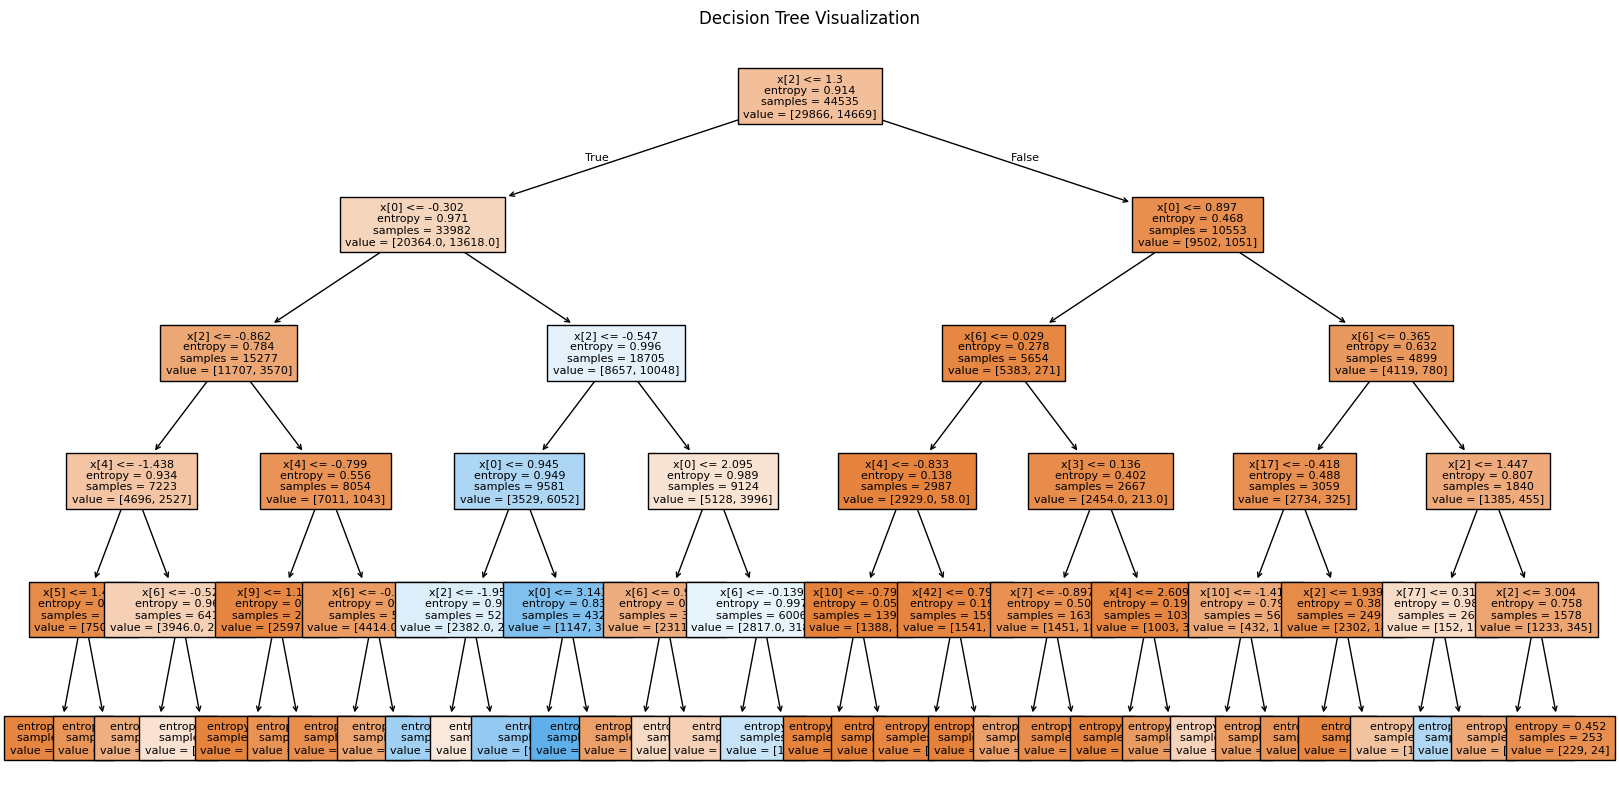

In [ ]:
# Decision Tree PCA 80%
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt

# Use the PCA-transformed data (X_train_pca_80 and X_test_pca_80) from your previous code

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train_pca_80, y_train)

# Make predictions
y_pred_train = clf.predict(X_train_pca_80)
y_pred_test = clf.predict(X_test_pca_80)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Additional metrics
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

# Calculate ROC AUC Score (if binary classification)
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca_80)[:, 1])
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importances (PCA Components)
feature_importances = pd.DataFrame({
    'PCA Component': [f'PCA_{i+1}' for i in range(X_train_pca_80.shape[1])],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", feature_importances)

### Hyperparameter Tuning for Decision Tree with PCA (80%)
This code fine-tunes a Decision Tree Classifier using the PCA-reduced dataset (80% explained variance). It leverages RandomizedSearchCV to optimize hyperparameters and evaluates the best model using various metrics.

In [ ]:
# Tuning PCA 80%

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the hyperparameter distributions
param_distributions = {
    'criterion': ['gini', 'entropy'],             # Splitting criteria
    'max_depth': [3, 5, 7, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]               # Minimum samples in a leaf node
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1   # Display progress
)

# Fit the model on the training data
random_search.fit(X_train_pca_80, y_train)

# Display the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Train the best model on the full training data
best_dt = random_search.best_estimator_
best_dt.fit(X_train_pca_80, y_train)

# Evaluate on the training set
y_pred_train = best_dt.predict(X_train_pca_80)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate on the test set
y_pred_test = best_dt.predict(X_test_pca_80)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
if len(set(y_test)) == 2:  # Only calculate ROC AUC for binary classification
    roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test_pca_80)[:, 1])
else:
    roc_auc = None  # ROC AUC not applicable for multiclass classification

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
if roc_auc is not None:
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.7578533737509824
Training Accuracy: 0.7758
Testing Accuracy: 0.7592
Mean Absolute Error: 0.2408
Mean Squared Error: 0.2408
ROC AUC Score: 0.8111

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     10026
         1.0       0.66      0.53      0.59      4820

    accuracy                           0.76     14846
   macro avg       0.73      0.70      0.71     14846
weighted avg       0.75      0.76      0.75     14846



### Decision Tree with PCA (40%)
This code trains and evaluates a Decision Tree Classifier using the PCA-reduced dataset (40% explained variance). The decision tree is visualized, and the importance of PCA components is analyzed.

Training Accuracy: 0.7504
Testing Accuracy: 0.7490

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82     10026
         1.0       0.65      0.50      0.56      4820

    accuracy                           0.75     14846
   macro avg       0.72      0.68      0.69     14846
weighted avg       0.74      0.75      0.74     14846


Confusion Matrix (Test Data):
 [[8729 1297]
 [2430 2390]]
ROC AUC Score: 0.7963


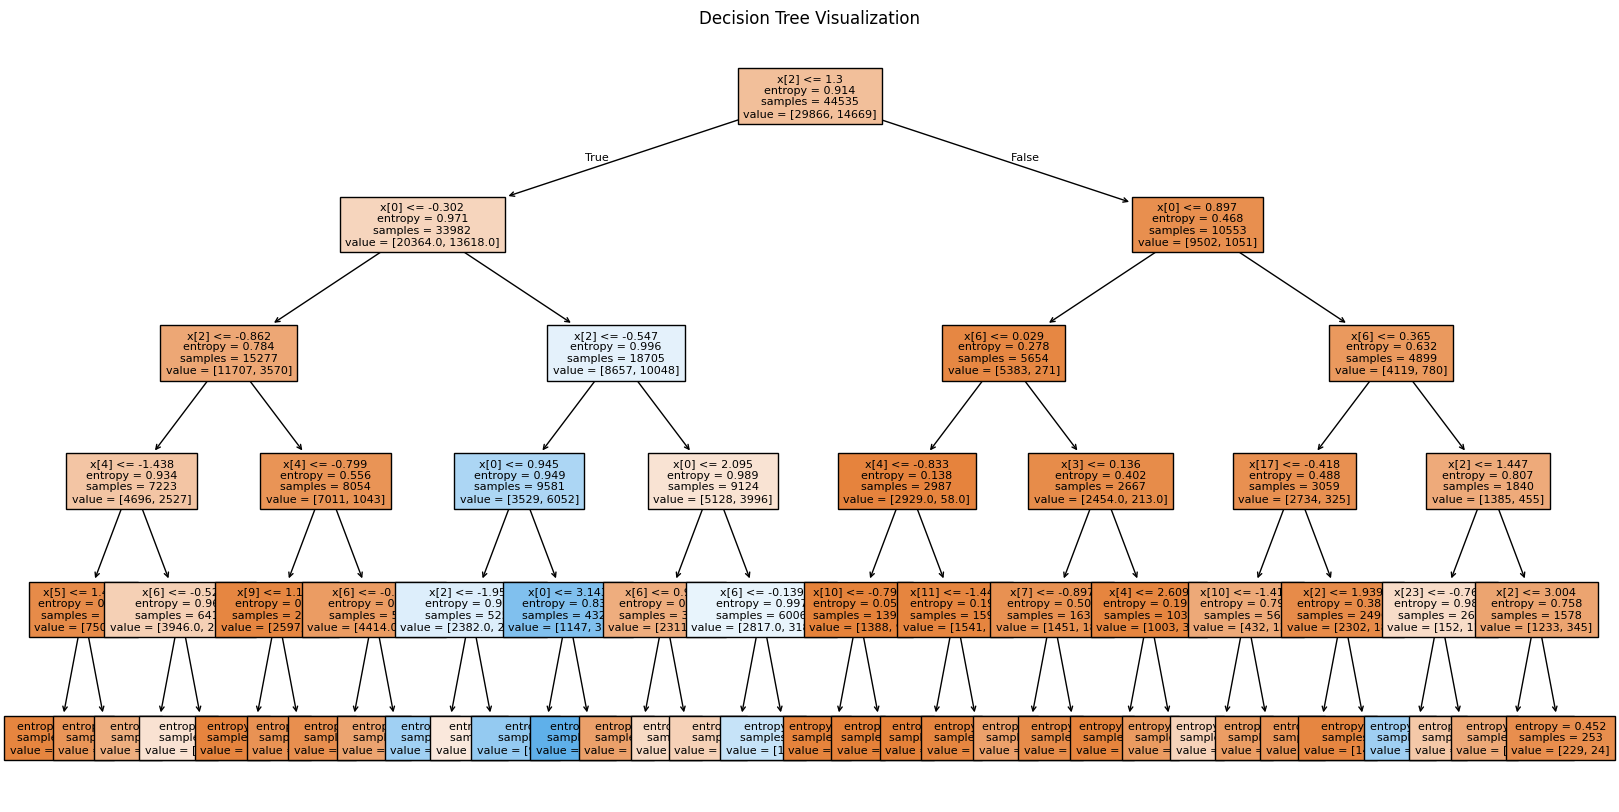

In [ ]:
# Decision Tree PCA 40%
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt

# Use the PCA-transformed data (X_train_pca_40 and X_test_pca_40) from your previous code

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train_pca_40, y_train)

# Make predictions
y_pred_train = clf.predict(X_train_pca_40)
y_pred_test = clf.predict(X_test_pca_40)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Additional metrics
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

# Calculate ROC AUC Score (if binary classification)
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca_40)[:, 1])
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importances (PCA Components)
feature_importances = pd.DataFrame({
    'PCA Component': [f'PCA_{i+1}' for i in range(X_train_pca_40.shape[1])],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", feature_importances)

### Hyperparameter Tuning for Decision Tree with PCA (40%)
This code fine-tunes a Decision Tree Classifier using the PCA-reduced dataset (40% explained variance). It leverages RandomizedSearchCV to optimize hyperparameters and evaluates the best model using various metrics.

In [ ]:
# Tuning PCA 40%
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the hyperparameter distributions
param_distributions = {
    'criterion': ['gini', 'entropy'],             # Splitting criteria
    'max_depth': [3, 5, 7, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]               # Minimum samples in a leaf node
}


# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1   # Display progress
)


# Fit the model on the training data
random_search.fit(X_train_pca_40, y_train)

# Display the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Train the best model on the full training data
best_dt = random_search.best_estimator_
best_dt.fit(X_train_pca_40, y_train)

# Evaluate on the training set
y_pred_train = best_dt.predict(X_train_pca_40)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate on the test set
y_pred_test = best_dt.predict(X_test_pca_40)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
if len(set(y_test)) == 2:  # Only calculate ROC AUC for binary classification
    roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test_pca_40)[:, 1])
else:
    roc_auc = None  # ROC AUC not applicable for multiclass classification

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
if roc_auc is not None:
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.7596048052093859
Training Accuracy: 0.7751
Testing Accuracy: 0.7599
Mean Absolute Error: 0.2401
Mean Squared Error: 0.2401
ROC AUC Score: 0.8123

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     10026
         1.0       0.66      0.53      0.59      4820

    accuracy                           0.76     14846
   macro avg       0.73      0.70      0.71     14846
weighted avg       0.75      0.76      0.75     14846



### Decision Tree with Unstandardized Original Data
This code trains and evaluates a Decision Tree Classifier using the original dataset (non-PCA-transformed). It provides insights into model performance using accuracy, classification metrics, and ROC AUC (for binary classification). Additionally, it visualizes the decision tree and computes feature importance.

Training Accuracy: 0.7928
Testing Accuracy: 0.7945

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     10026
         1.0       0.65      0.81      0.72      4820

    accuracy                           0.79     14846
   macro avg       0.77      0.80      0.78     14846
weighted avg       0.81      0.79      0.80     14846


Confusion Matrix (Test Data):
 [[7898 2128]
 [ 923 3897]]
ROC AUC Score: 0.8644


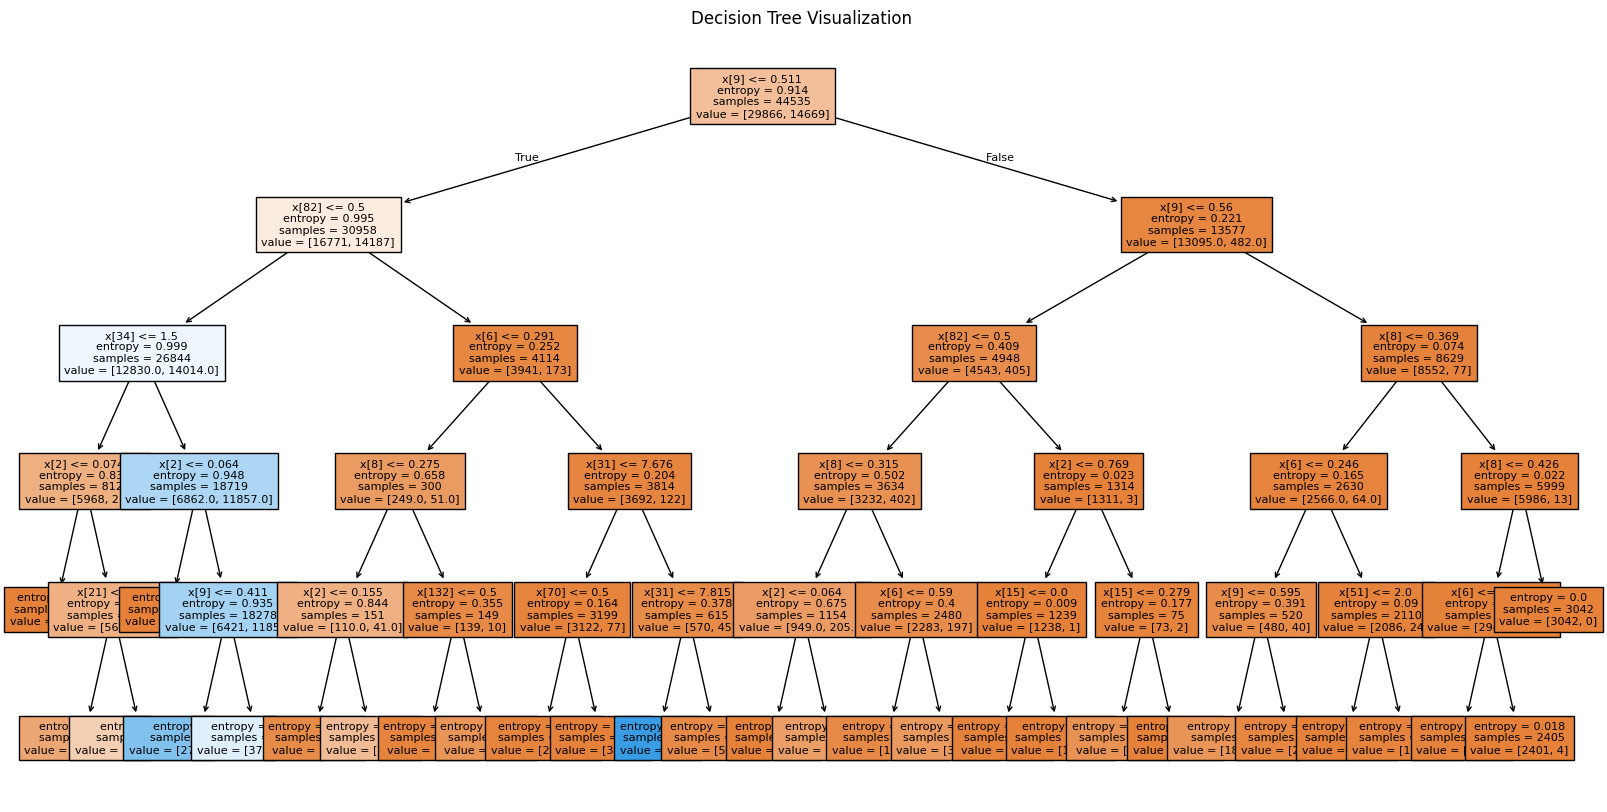

In [ ]:
# Decision Tree Unstandardized Original
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt

# Use the PCA-transformed data (X_train_pca and X_test_pca) from your previous code

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Additional metrics
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

# Calculate ROC AUC Score (if binary classification)
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importances (PCA Components)
feature_importances = pd.DataFrame({
    'PCA Component': [f'PCA_{i+1}' for i in range(X_train.shape[1])],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", feature_importances)

### Hyperparameter Tuning for Decision Tree with Unstandardized Original Data
This code performs hyperparameter tuning for a Decision Tree Classifier using the original dataset (non-PCA-transformed). It employs RandomizedSearchCV to identify the optimal hyperparameters and evaluates the tuned model using accuracy, error metrics, and classification reports.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the hyperparameter distributions
param_distributions = {
    'criterion': ['gini', 'entropy'],             # Splitting criteria
    'max_depth': [3, 5, 7, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]               # Minimum samples in a leaf node
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1   # Display progress
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Display the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Train the best model on the full training data
best_dt = random_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate on the training set
y_pred_train = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate on the test set
y_pred_test = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
if len(set(y_test)) == 2:  # Only calculate ROC AUC for binary classification
    roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
else:
    roc_auc = None  # ROC AUC not applicable for multiclass classification

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
if roc_auc is not None:
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.8090490625350848
Training Accuracy: 0.8162
Testing Accuracy: 0.8177
Mean Absolute Error: 0.1823
Mean Squared Error: 0.1823
ROC AUC Score: 0.8785

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86     10026
         1.0       0.70      0.78      0.74      4820

    accuracy                           0.82     14846
   macro avg       0.79      0.81      0.80     14846
weighted avg       0.83      0.82      0.82     14846



### Decision Tree with Standardized Original Data
This code trains and evaluates a Decision Tree Classifier using the original dataset (non-PCA-transformed). It provides insights into model performance using accuracy, classification metrics, and ROC AUC (for binary classification). Additionally, it visualizes the decision tree and computes feature importance.

Training Accuracy: 0.7928
Testing Accuracy: 0.7945

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     10026
         1.0       0.65      0.81      0.72      4820

    accuracy                           0.79     14846
   macro avg       0.77      0.80      0.78     14846
weighted avg       0.81      0.79      0.80     14846


Confusion Matrix (Test Data):
 [[7898 2128]
 [ 923 3897]]
ROC AUC Score: 0.8644


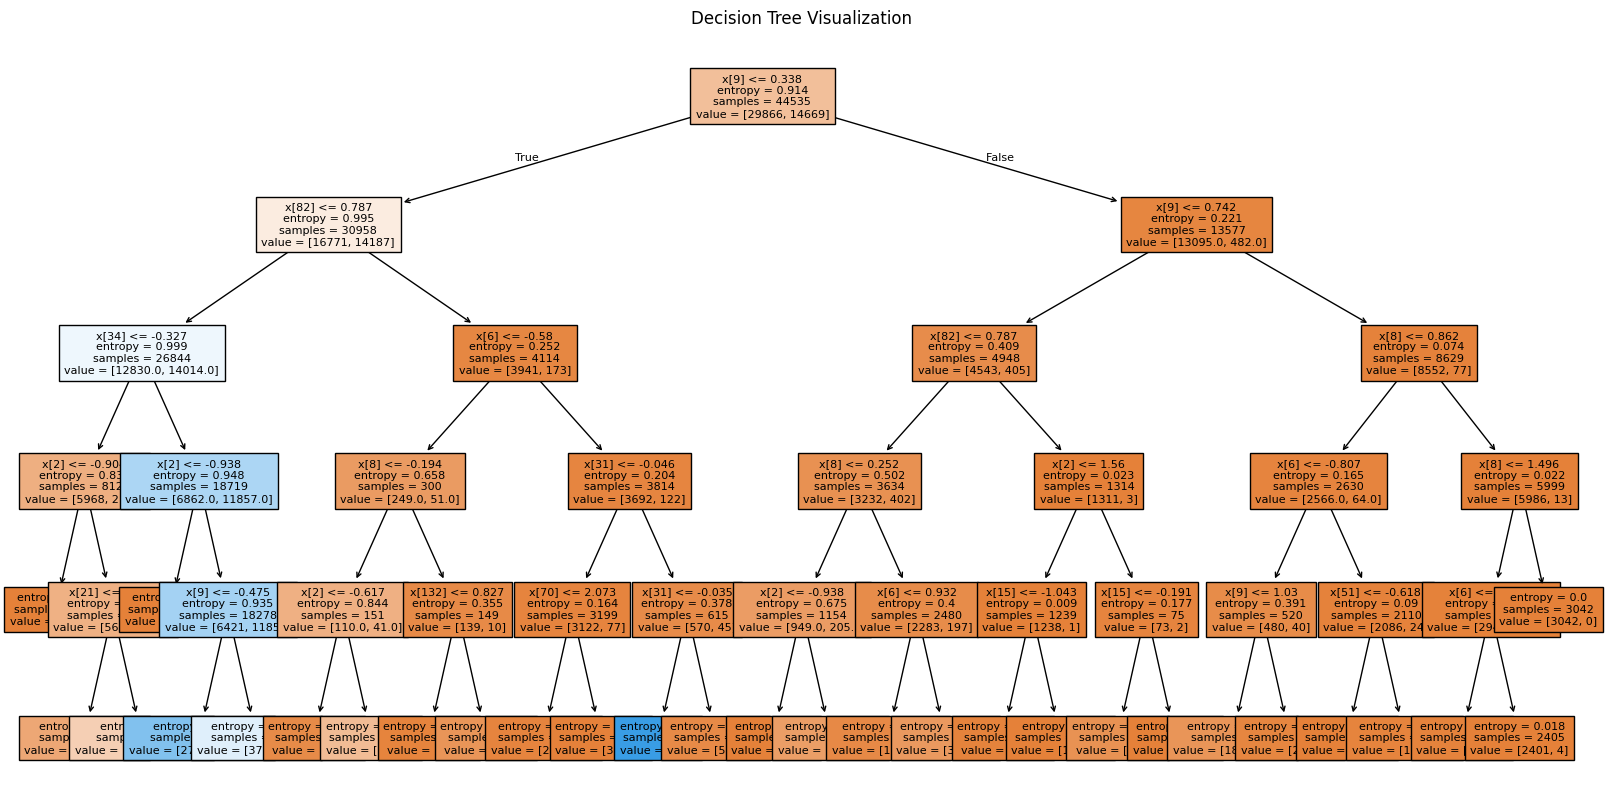

In [ ]:
# Decision Tree, Standardized Original Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt

# Use the PCA-transformed data (X_train_pca and X_test_pca) from your previous code

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Additional metrics
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

# Calculate ROC AUC Score (if binary classification)
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importances (PCA Components)
feature_importances = pd.DataFrame({
    'PCA Component': [f'PCA_{i+1}' for i in range(X_train_scaled.shape[1])],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", feature_importances)

### Hyperparameter Tuning for Decision Tree with Standardized Original Data
This code performs hyperparameter tuning for a Decision Tree Classifier using the original dataset (non-PCA-transformed). It employs RandomizedSearchCV to identify the optimal hyperparameters and evaluates the tuned model using accuracy, error metrics, and classification reports.

In [ ]:
# Tuning Standardized Original Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the hyperparameter distributions
param_distributions = {
    'criterion': ['gini', 'entropy'],             # Splitting criteria
    'max_depth': [3, 5, 7, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]               # Minimum samples in a leaf node
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1   # Display progress
)

# Fit the model on the training data
random_search.fit(X_train_scaled, y_train)

# Display the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Train the best model on the full training data
best_dt = random_search.best_estimator_
best_dt.fit(X_train_scaled, y_train)

# Evaluate on the training set
y_pred_train = best_dt.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate on the test set
y_pred_test = best_dt.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
if len(set(y_test)) == 2:  # Only calculate ROC AUC for binary classification
    roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test_scaled)[:, 1])
else:
    roc_auc = None  # ROC AUC not applicable for multiclass classification

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
if roc_auc is not None:
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.8090490625350848
Training Accuracy: 0.8162
Testing Accuracy: 0.8177
Mean Absolute Error: 0.1823
Mean Squared Error: 0.1823
ROC AUC Score: 0.8785

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86     10026
         1.0       0.70      0.78      0.74      4820

    accuracy                           0.82     14846
   macro avg       0.79      0.81      0.80     14846
weighted avg       0.83      0.82      0.82     14846



In [ ]:
!pip install scikeras

## Neural Network and PCA

### Neural Network with PCA (80%)
This code trains and optimizes a neural network on the PCA-reduced dataset (80% explained variance). It uses Keras and GridSearchCV for hyperparameter tuning, cross-validation, and model evaluation.

In [ ]:
# Neutral Network, 80% PCA

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report



# Define the model creation function
def create_model(neurons=64, learning_rate=0.001, dropout_rate=0.2, activation='relu'):
    """
    Creates a Keras model with specified hyperparameters.
    """
    model = Sequential([
        # First Dense layer with dynamic activation
        Dense(neurons, activation=activation, input_shape=(X_train_pca_80.shape[1],)),
        Dropout(dropout_rate),

        # Second Dense layer
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(
    model=create_model,  # Pass the function here
    verbose=0
)

# Define the grid search
param_grid = {
    'model__neurons': [64],           # Number of neurons in Dense layers
    'model__learning_rate': [0.001],    # Learning rates for the Adam optimizer
    'model__dropout_rate': [0.2],   # Dropout rates to prevent overfitting
    'model__activation': ['relu', 'sigmoid'],  # Activation functions to test
    'batch_size': [32],               # Batch sizes for gradient updates
    'epochs': [50]                        # Number of training epochs
}

# Perform Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

grid_result = grid.fit(X_train_pca_80, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate on the training data
y_train_pred = best_model.predict(X_train_pca_80)
train_accuracy = best_model.score(X_train_pca_80, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test_pca_80)
test_accuracy = best_model.score(X_test_pca_80, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate additional metrics for the test data
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ROC AUC score (requires probability predictions)
y_test_proba = best_model.predict_proba(X_test_pca_80)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 32, 'epochs': 50, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons': 64}
Best Accuracy: 0.8099696867632199
Training Accuracy: 0.8311
Test Accuracy: 0.8159
Mean Squared Error (MSE): 0.1841
Mean Absolute Error (MAE): 0.1841
ROC AUC Score: 0.8905

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     10026
         1.0       0.73      0.70      0.71      4820

    accuracy                           0.82     14846
   macro avg       0.79      0.78      0.79     14846
weighted avg       0.81      0.82      0.81     14846



### Neural Network with PCA (40%)
This code trains and optimizes a neural network on the PCA-reduced dataset (40% explained variance). It uses Keras and GridSearchCV for hyperparameter tuning, cross-validation, and model evaluation.

In [ ]:
# Neutral Network, 40% PCA

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report



# Define the model creation function
def create_model(neurons=64, learning_rate=0.001, dropout_rate=0.2, activation='relu'):
    """
    Creates a Keras model with specified hyperparameters.
    """
    model = Sequential([
        # First Dense layer with dynamic activation
        Dense(neurons, activation=activation, input_shape=(X_train_pca_40.shape[1],)),
        Dropout(dropout_rate),

        # Second Dense layer
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(
    model=create_model,  # Pass the function here
    verbose=0
)

# Define the grid search
param_grid = {
    'model__neurons': [64],           # Number of neurons in Dense layers
    'model__learning_rate': [0.001],    # Learning rates for the Adam optimizer
    'model__dropout_rate': [0.2],   # Dropout rates to prevent overfitting
    'model__activation': ['relu', 'sigmoid'],  # Activation functions to test
    'batch_size': [32],               # Batch sizes for gradient updates
    'epochs': [50]                        # Number of training epochs
}

# Perform Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

grid_result = grid.fit(X_train_pca_40, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate on the training data
y_train_pred = best_model.predict(X_train_pca_40)
train_accuracy = best_model.score(X_train_pca_40, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test_pca_40)
test_accuracy = best_model.score(X_test_pca_40, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate additional metrics for the test data
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ROC AUC score (requires probability predictions)
y_test_proba = best_model.predict_proba(X_test_pca_40)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons': 64}
Best Accuracy: 0.8036151341641405
Training Accuracy: 0.8285
Test Accuracy: 0.8129
Mean Squared Error (MSE): 0.1871
Mean Absolute Error (MAE): 0.1871
ROC AUC Score: 0.8831

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     10026
         1.0       0.73      0.68      0.70      4820

    accuracy                           0.81     14846
   macro avg       0.79      0.78      0.78     14846
weighted avg       0.81      0.81      0.81     14846



### Neural Network with Unstandardized Original Data
This code trains and evaluates a neural network using the original dataset (non-PCA-transformed). It performs hyperparameter tuning using GridSearchCV and evaluates the model using metrics like accuracy, MSE, MAE, ROC AUC, and a classification report.

In [ ]:
# Neutral Network, Original Data

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report



# Define the model creation function
def create_model(neurons=64, learning_rate=0.001, dropout_rate=0.2, activation='relu'):
    """
    Creates a Keras model with specified hyperparameters.
    """
    model = Sequential([
        # First Dense layer with dynamic activation
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),

        # Second Dense layer
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(
    model=create_model,  # Pass the function here
    verbose=0
)

# Define the grid search
param_grid = {
    'model__neurons': [64],           # Number of neurons in Dense layers
    'model__learning_rate': [0.001],    # Learning rates for the Adam optimizer
    'model__dropout_rate': [0.2],   # Dropout rates to prevent overfitting
    'model__activation': ['relu', 'sigmoid'],  # Activation functions to test
    'batch_size': [32],               # Batch sizes for gradient updates
    'epochs': [50]                        # Number of training epochs
}

# Perform Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate on the training data
y_train_pred = best_model.predict(X_train)
train_accuracy = best_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate additional metrics for the test data
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ROC AUC score (requires probability predictions)
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 32, 'epochs': 50, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons': 64}
Best Accuracy: 0.8029415066801391
Training Accuracy: 0.8179
Test Accuracy: 0.8111
Mean Squared Error (MSE): 0.1889
Mean Absolute Error (MAE): 0.1889
ROC AUC Score: 0.8890

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     10026
         1.0       0.73      0.67      0.70      4820

    accuracy                           0.81     14846
   macro avg       0.79      0.77      0.78     14846
weighted avg       0.81      0.81      0.81     14846



### Neural Network with Standardized Original Data
This code trains and evaluates a neural network using the original dataset (non-PCA-transformed). It performs hyperparameter tuning using GridSearchCV and evaluates the model using metrics like accuracy, MSE, MAE, ROC AUC, and a classification report.

In [ ]:
# Neutral Network, Standardized Original Data

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report



# Define the model creation function
def create_model(neurons=64, learning_rate=0.001, dropout_rate=0.2, activation='relu'):
    """
    Creates a Keras model with specified hyperparameters.
    """
    model = Sequential([
        # First Dense layer with dynamic activation
        Dense(neurons, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),

        # Second Dense layer
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(
    model=create_model,  # Pass the function here
    verbose=0
)

# Define the grid search
param_grid = {
    'model__neurons': [64],           # Number of neurons in Dense layers
    'model__learning_rate': [0.001],    # Learning rates for the Adam optimizer
    'model__dropout_rate': [0.2],   # Dropout rates to prevent overfitting
    'model__activation': ['relu', 'sigmoid'],  # Activation functions to test
    'batch_size': [32],               # Batch sizes for gradient updates
    'epochs': [50]                        # Number of training epochs
}

# Perform Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

grid_result = grid.fit(X_train_scaled, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate on the training data
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = best_model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate additional metrics for the test data
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ROC AUC score (requires probability predictions)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 32, 'epochs': 50, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons': 64}
Best Accuracy: 0.8227910632087123
Training Accuracy: 0.8546
Test Accuracy: 0.8244
Mean Squared Error (MSE): 0.1756
Mean Absolute Error (MAE): 0.1756
ROC AUC Score: 0.8972

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     10026
         1.0       0.73      0.73      0.73      4820

    accuracy                           0.82     14846
   macro avg       0.80      0.80      0.80     14846
weighted avg       0.82      0.82      0.82     14846

